In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *
import os
import pickle
import warnings
warnings.filterwarnings('ignore')

In [0]:
# from google.colab import drive, files
# drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# os.chdir('gdrive/My Drive')

In [0]:
! pip3 install kaggle --upgrade

Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.6)


In [0]:
os.listdir('asl-alphabet/asl_alphabet_train/asl_alphabet_train')

['N',
 'P',
 'space',
 'S',
 'T',
 'I',
 'J',
 'U',
 'V',
 'W',
 'F',
 'O',
 'nothing',
 'M',
 'H',
 'Y',
 'del',
 'D',
 'Z',
 'R',
 'C',
 'A',
 'G',
 'E',
 'L',
 'Q',
 'B',
 'K',
 'X']

In [0]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [0]:
! mkdir -p ~/.kaggle
! mv kaggle.json ~/.kaggle

In [0]:
! kaggle datasets download -d grassknoted/asl-alphabet 

 99% 1.01G/1.03G [00:09<00:00, 118MB/s]
100% 1.03G/1.03G [00:09<00:00, 113MB/s]


In [0]:
!unzip -q asl-alphabet.zip -d asl-alphabet/ 

In [0]:
# path_train = Path("asl-alphabet-small/asl-alphabet-small/asl_alphabet_train/")
# fnames = list(path_train.glob('**/*.jpg'))
# pat = r"(?#/)([A-Z]|space|nothing|del)(?=/)"
# data = ImageDataBunch.from_name_re(path_train,fnames,pat,ds_tfms = get_transforms(),size =224,num_workers = 0)

In [0]:
path = Path("asl-alphabet/asl_alphabet_train/asl_alphabet_train/")
data = ImageDataBunch.from_folder(path = path,ds_tfms = get_transforms(),size =224,valid_pct=0.2,num_workers = 0).normalize(imagenet_stats)

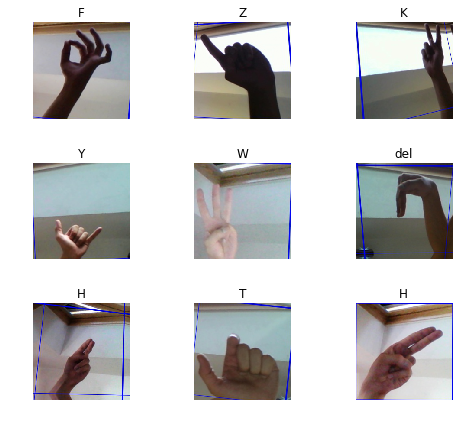

In [0]:
data.show_batch(rows = 3, figsize = (7,6))

In [0]:
learn = cnn_learner(data,models.resnet34,metrics = error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:05<00:00, 14.6MB/s]


In [0]:
# learn.fit_one_cycle(2,max_lr=3e-2)
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.172375,0.047872,0.015977,19:27
1,0.073375,0.007756,0.002644,19:25
2,0.024214,0.002570,0.000920,19:26
3,0.017923,0.001968,0.000632,19:29


In [0]:
interp = ClassificationInterpretation.from_learner(learn)

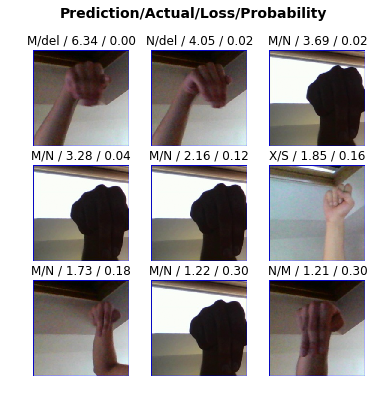

In [0]:
interp.plot_top_losses(9, figsize=(6,6))

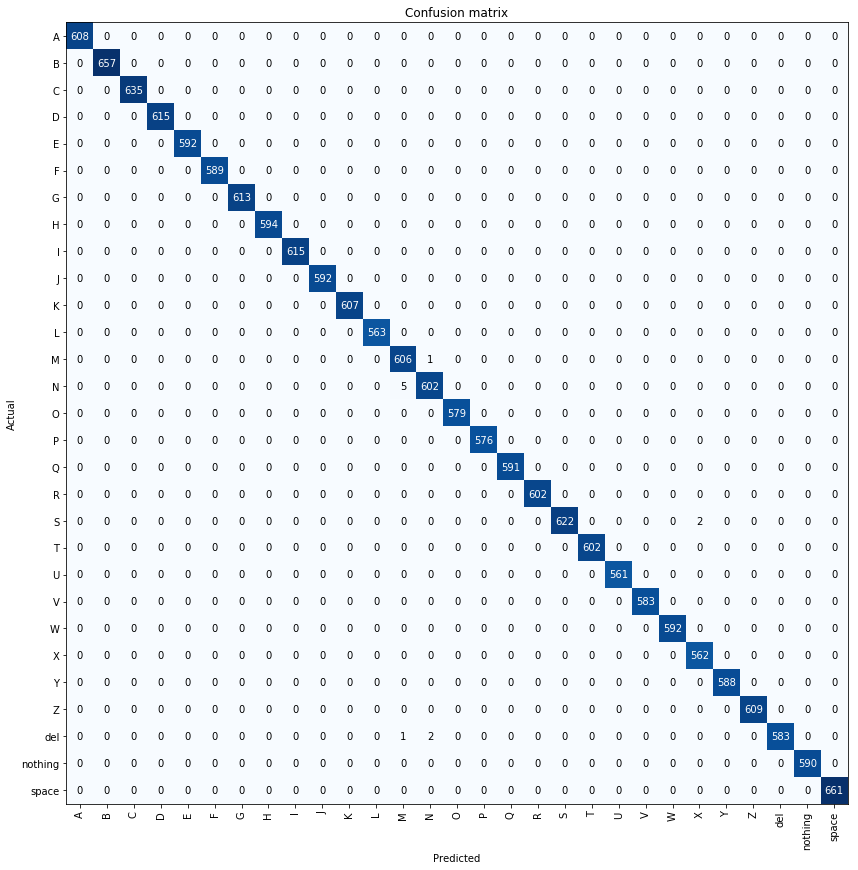

In [0]:
interp.plot_confusion_matrix(figsize = (10,10))

In [0]:
interp.most_confused(min_val = 1)

[('N', 'M', 5), ('S', 'X', 2), ('del', 'N', 2)]

In [0]:
img = learn.data.train_ds[0][0]
learn.predict(img)

(Category N,
 tensor(13),
 tensor([2.3660e-14, 6.2877e-13, 2.8111e-13, 1.7482e-14, 5.5386e-15, 1.5699e-13,
         3.9988e-15, 5.9564e-14, 4.9943e-17, 1.1439e-18, 1.9079e-13, 5.0954e-13,
         2.5626e-10, 1.0000e+00, 4.2453e-13, 1.8607e-13, 4.5579e-13, 6.2250e-15,
         6.0525e-14, 8.7423e-13, 7.5925e-15, 1.3437e-12, 3.4018e-14, 7.7985e-14,
         4.6008e-15, 2.7756e-14, 8.8385e-14, 2.5202e-13, 2.9569e-15]))

In [0]:
learn.save('stage-1')

In [0]:
os.listdir()

['.config', 'asl-alphabet.zip', 'asl-alphabet', 'sample_data']

In [0]:
files.download("asl-alphabet/asl_alphabet_train/asl_alphabet_train/models/stage-1.pth")

FileNotFoundError: ignored

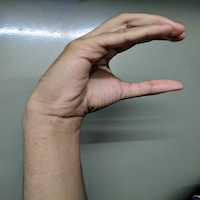

In [0]:
img = open_image("IMG_20190923_163856.jpg")
img

In [0]:
learn.predict(img)

(Category C,
 tensor(2),
 tensor([1.3069e-09, 8.4401e-08, 9.9997e-01, 3.9075e-09, 5.1381e-09, 3.1764e-09,
         4.9695e-06, 7.9648e-06, 9.0491e-11, 1.8056e-08, 7.6693e-11, 5.7072e-06,
         9.3043e-10, 1.5676e-07, 3.3882e-07, 1.3147e-07, 5.7975e-06, 1.4166e-07,
         8.4843e-08, 1.6460e-07, 1.4724e-06, 4.7916e-10, 9.6651e-10, 2.0161e-08,
         7.8107e-10, 1.8096e-06, 1.0344e-06, 3.2276e-10, 1.4987e-08]))

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(4,max_lr=slice(1e-6,9e-6))

epoch,train_loss,valid_loss,error_rate,time
0,0.015655,0.001534,0.000402,22:56
1,0.011862,0.000747,0.000287,23:02
2,0.010202,0.000661,0.000230,23:00
3,0.011131,0.000810,0.000230,22:50


In [0]:
learn.save('model-slice-lr')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [0]:
interp.most_confused(min_val = 1)

[('del', 'N', 2), ('S', 'X', 1), ('del', 'M', 1)]

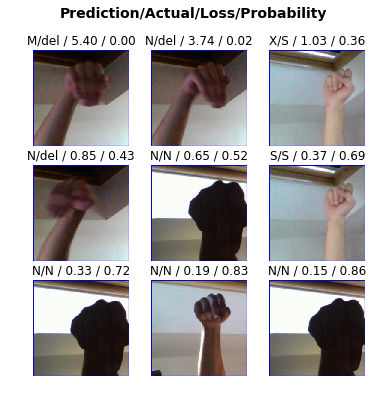

In [0]:
interp.plot_top_losses(9, figsize=(6,6))

In [0]:
learn.load('stage-1');

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


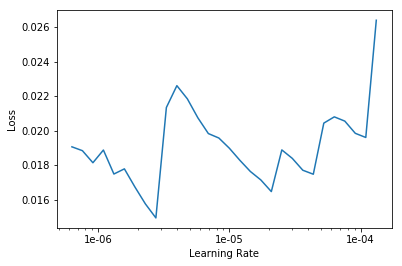

In [0]:
learn.recorder.plot()

In [0]:
img = open_image(Path('asl-alphabet/asl_alphabet_test/asl_alphabet_test/nothing_test.jpg'))
learn.predict(img)

(Category nothing,
 tensor(27),
 tensor([7.6709e-10, 3.1255e-08, 1.5930e-08, 1.8427e-09, 3.3527e-08, 1.7861e-10,
         2.4736e-10, 2.8471e-11, 4.1653e-11, 8.3719e-16, 1.6719e-09, 1.2082e-13,
         9.4394e-12, 2.1812e-12, 4.2218e-15, 6.3540e-14, 1.9836e-14, 6.7295e-13,
         7.1905e-16, 4.8873e-16, 1.3656e-16, 1.8178e-15, 4.1085e-16, 1.9476e-15,
         3.7349e-16, 1.3614e-15, 1.0236e-14, 1.0000e+00, 8.4284e-14]))

In [0]:
files.download(str(path)+"/class_names.pkl")

In [0]:
learn.save('model-after-unfreeze')

In [0]:
str(path)

'asl-alphabet/asl_alphabet_train/asl_alphabet_train'

In [0]:
with open(path/"class_names.pkl","wb") as pkl_file:
  pickle.dump(data.classes,pkl_file)

In [0]:
data2 = ImageDataBunch.single_from_classes(path,classes,ds_tfms= get_transforms(),size = 224).normalize(imagenet_stats)

In [0]:
learn = cnn_learner(data2,models.resnet34)

In [0]:
learn.load('stage-1');

In [0]:
#os.listdir()